In [1]:
!unzip archive.zip -d extracted_files

Archive:  archive.zip
  inflating: extracted_files/dataset/Beagle/Beagle_1.jpg  
  inflating: extracted_files/dataset/Beagle/Beagle_10.jpg  
  inflating: extracted_files/dataset/Beagle/Beagle_100.jpg  
  inflating: extracted_files/dataset/Beagle/Beagle_11.jpg  
  inflating: extracted_files/dataset/Beagle/Beagle_12.jpg  
  inflating: extracted_files/dataset/Beagle/Beagle_13.jpg  
  inflating: extracted_files/dataset/Beagle/Beagle_14.jpg  
  inflating: extracted_files/dataset/Beagle/Beagle_15.jpg  
  inflating: extracted_files/dataset/Beagle/Beagle_16.jpg  
  inflating: extracted_files/dataset/Beagle/Beagle_17.jpg  
  inflating: extracted_files/dataset/Beagle/Beagle_18.jpg  
  inflating: extracted_files/dataset/Beagle/Beagle_19.jpg  
  inflating: extracted_files/dataset/Beagle/Beagle_2.jpg  
  inflating: extracted_files/dataset/Beagle/Beagle_20.jpg  
  inflating: extracted_files/dataset/Beagle/Beagle_21.jpg  
  inflating: extracted_files/dataset/Beagle/Beagle_22.jpg  
  inflating: extrac

In [3]:
!pip install tensorflow

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached termcolor-3.2.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached markdown-3.10-py3-none-any.whl.metadata (5.1 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-14.2.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached markdow

In [19]:
import os
import PIL
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [20]:
class_names = sorted(os.listdir('dataset'))
class_ids = {label: i for i, label in enumerate(class_names)}

# Ερώτηση 3

In [21]:
image_size = (64, 64)

inputs = []
targets = []
for label in class_names:
	for filename in os.listdir(f'dataset/{label}'):
		filepath = f'dataset/{label}/{filename}'
		img = PIL.Image.open(filepath).convert('RGB').resize(image_size)
		inputs.append(img)
		targets.append(class_ids[label])
inputs = np.float32(inputs)
targets = np.int32(targets)

In [22]:
seed = 0

tf.random.set_seed(seed=seed)
np.random.seed(seed=seed)
random.seed(seed)

In [24]:

test_size = 0.3
stratify = [targets.shape]

x_train, x_test, y_train, y_test = train_test_split(
    inputs,
    targets,
    test_size=0.3,
    stratify=targets,
    random_state=seed
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((676, 64, 64, 3), (676,), (291, 64, 64, 3), (291,))

In [25]:
x_train /= 255.0
x_test /= 255.0
y_train = np.eye(len(class_names))[y_train]
y_test = np.eye(len(class_names))[y_test]

In [26]:
input_size = x_train.shape[1:]
output_size = len(class_names)

mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='MLP')
mlp.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,590,794 (6.07 MB)

 Trainable params: 1,590,794 (6.07 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
mlp.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
batch_size = 32
epochs = 50

history = mlp.fit(
	x_train,
	y_train,
	batch_size=batch_size,
	epochs=epochs,
	validation_data=(x_test, y_test)
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1213 - loss: 3.1365 - val_accuracy: 0.2027 - val_loss: 2.3705
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2411 - loss: 2.1194 - val_accuracy: 0.2887 - val_loss: 2.0038
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3417 - loss: 1.8535 - val_accuracy: 0.3505 - val_loss: 1.8851
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4482 - loss: 1.5947 - val_accuracy: 0.3677 - val_loss: 1.6176
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5533 - loss: 1.3498 - val_accuracy: 0.5636 - val_loss: 1.4648
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6361 - loss: 1.2029 - val_accuracy: 0.5670 - val_loss: 1.3883
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7249 - loss: 0.9878 - val_accuracy: 0.6048 - val_loss: 1.2511
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7973 - loss: 0.8155 - val_accuracy: 0.6323 - val_loss:

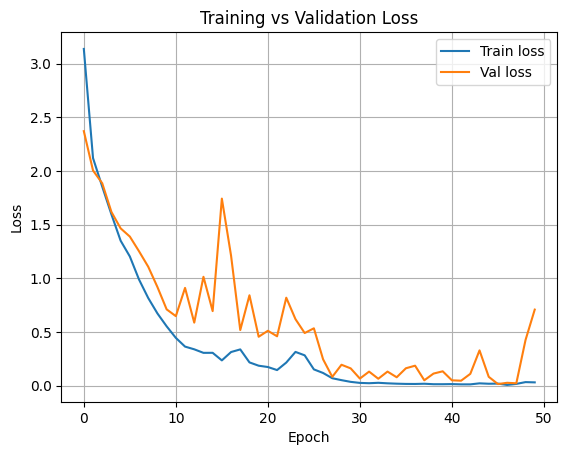

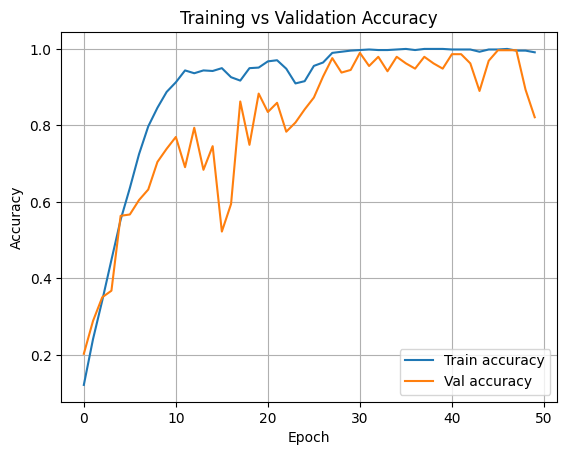

In [29]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='CNN')
cnn.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,456,298 (13.18 MB)

 Trainable params: 3,456,298 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(
	x_train,
	y_train,
	batch_size=batch_size,
	epochs=epochs,
	validation_data=(x_test, y_test)
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1790 - loss: 2.2689 - val_accuracy: 0.3093 - val_loss: 2.0192
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5385 - loss: 1.5920 - val_accuracy: 0.7010 - val_loss: 1.1603
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8092 - loss: 0.7655 - val_accuracy: 0.7732 - val_loss: 0.7036
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9275 - loss: 0.3301 - val_accuracy: 0.9141 - val_loss: 0.3180
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9704 - loss: 0.1265 - val_accuracy: 0.9863 - val_loss: 0.1179
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9970 - loss: 0.0372 - val_accuracy: 0.9966 - val_loss: 0.0497
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9985 - loss: 0.0239 - val_accuracy: 0.9966 - val_loss: 0.0313
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9970 - loss: 0.0158 - val_accuracy: 0.9966 - v

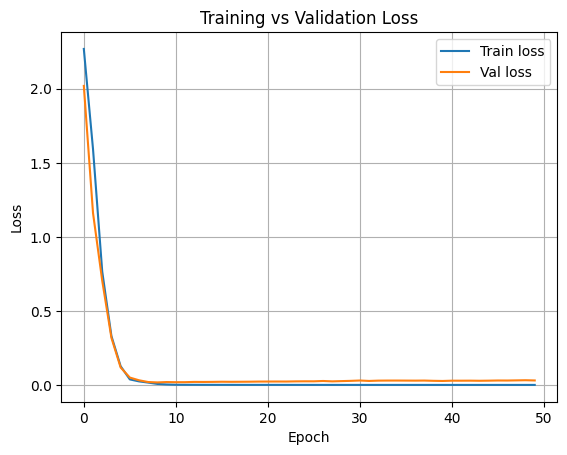

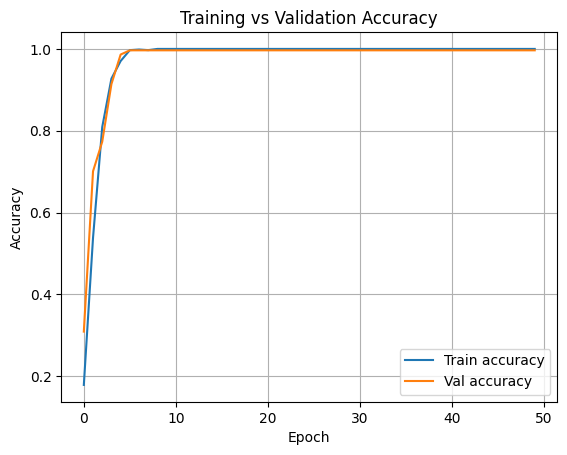

In [18]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Ερώτηση 7
Το nlp έχει την πληροφορία ότι αυτό που μπαίνει στην εισοδό του είναι εικόνα και το αντιμετωπίζει ως τέτοιο. Έχει την ικανότητα να εντοπίζει αντικείμενα και features μέσα από αυτήν. Απεναντίας, τα mlp αντιμετωπίζουν την εικόνα σαν ένα μεγάλο διάνυσμα, όπου αυτή η πληροφορία δε
